<a href="https://colab.research.google.com/github/Tuhinm2002/nlp_preprocessing/blob/main/Text_Preprocessing_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install datasets transformers sentencepiece -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasets import load_dataset

class HuggingfaceToCSV():
    def __init__(self):
        self.dataset = load_dataset("carblacac/twitter-sentiment-analysis",trust_remote_code=True,)

        self.df_train = pd.DataFrame(self.dataset['train'],columns=['text', 'feeling'])

        self.df_test = pd.DataFrame(self.dataset['test'],columns=['text', 'feeling'])
        self.df_val = pd.DataFrame(self.dataset['validation'],columns=['text', 'feeling'])

    def generateDataset(self):

        self.df_train.to_csv("train.csv",index=False)
        self.df_test.to_csv("test.csv",index=False)
        self.df_val.to_csv("val.csv",index=False)

if __name__ == '__main__':
    HFCSV = HuggingfaceToCSV()
    HFCSV.generateDataset()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:80: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/149985 [00:00<?, ? examples/s]

Map:   0%|          | 0/61998 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/120 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/62 [00:00<?, ?ba/s]

Generating train split:   0%|          | 0/119988 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/61998 [00:00<?, ? examples/s]

In [ ]:
# datasets.load_dataset("bookcorpus", split="train+test")

In [ ]:
import pandas as pd
import numpy  as np
import string
import re

class DatasetPreprocess():
    def __init__(self):
        self.trainData = pd.read_csv("train.csv")
        self.testData = pd.read_csv("test.csv")
        self.valData = pd.read_csv("val.csv")

    def removePunctuations(self,textData):
        for char in string.punctuation:
            textData = textData.replace(char,'')
        return textData

    def removeURL(self,textData):
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        urls = url_pattern.findall(textData)

        for url in urls:
            textData = textData.replace(url, "")

        return textData

    def removeHTMLTag(self,textData):
        pattern = re.compile("<.*?>")
        return pattern.sub(r'',textData)

    def preprocessTrainData(self):

      self.trainData['text'] = self.trainData['text'].apply(self.removeHTMLTag)
      self.trainData['text'] = self.trainData['text'].apply(self.removeURL)
      self.trainData['text'] = self.trainData['text'].apply(self.removePunctuations)


    def preprocessTestData(self):

      self.testData['text'] = self.testData['text'].apply(self.removeHTMLTag)
      self.testData['text'] = self.testData['text'].apply(self.removeURL)
      self.testData['text'] = self.testData['text'].apply(self.removePunctuations)



    def preprocessValData(self):

      self.valData['text'] = self.valData['text'].apply(self.removeHTMLTag)
      self.valData['text'] = self.valData['text'].apply(self.removeURL)
      self.valData['text'] = self.valData['text'].apply(self.removePunctuations)



if __name__ == "__main__":

    dataPreprocess = DatasetPreprocess()
    dataPreprocess.preprocessTrainData()
    dataPreprocess.preprocessTestData()
    dataPreprocess.preprocessValData()


In [ ]:
d_tr = pd.read_csv("train.csv")

In [ ]:
d_tr

,text,feeling
0,@fa6ami86 so happy that salman won. btw the 1...,0
1,@phantompoptart .......oops.... I guess I'm ki...,0
2,@bradleyjp decidedly undecided. Depends on the...,1
3,@Mountgrace lol i know! its so frustrating isn...,1
4,@kathystover Didn't go much of any where - Lif...,1
...,...,...
119983,I so should be in bed but I can't sleep,0
119984,@mickeymab mine's in my profile - '77cb550 and...,1
119985,@stacyreeves Awe... I wish I could. I am here...,0
119986,Is it me or is Vodafone UK business support ru...,0


In [ ]:
def removePunctuations(textData):
        for char in string.punctuation:
            textData = textData.replace(char,'')
        return textData

def removeURL(textData):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    urls = url_pattern.findall(textData)

    for url in urls:
        textData = textData.replace(url, "")

    return textData

def removeHTMLTag(textData):
    pattern = re.compile("<.*?>")
    return pattern.sub(r'',textData)

def preprocessTrainData(self,data):

  data['text'] = data['text'].apply(self.removeHTMLTag)
  data['text'] = data['text'].apply(self.removeURL)
  data['text'] = data['text'].apply(self.removePunctuations)


preprocessTrainData(pd.read_csv("train.csv"))

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:80: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from transformers import BertForSequenceClassification

model_0 = BertForSequenceClassification.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
import torch.nn as nn

In [ ]:
text = tokenizer("hello world",return_tensors='pt')

with torch.no_grad():
  output = model_0(**text)

In [ ]:
text['input_ids']

tensor([[ 101, 7592, 2088,  102]])

In [ ]:
torch.argmax(output.logits)

tensor(1)

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer

class tokenizedText():
    def __init__(self,textData,tokenizer="bert-base-uncased"):
        self.textData = textData
        self.tokenizer = BertTokenizer.from_pretrained(tokenizer)

    def generateToken(self):
        data = self.tokenizer(self.textData,max_length=128,padding="max_length",truncation=True)

        return {"input_ids":torch.tensor(data["input_ids"]).flatten(),"attention_mask":torch.tensor(data["attention_mask"]).flatten()}

    def generateText(self,text):

      return  self.tokenizer.decode(text,skip_special_tokens=True)
if __name__ == "__main__":
  textData = tokenizedText("hello world")

In [ ]:
d = textData.generateToken()['input_ids']
print(textData.generateText(d))

hello world


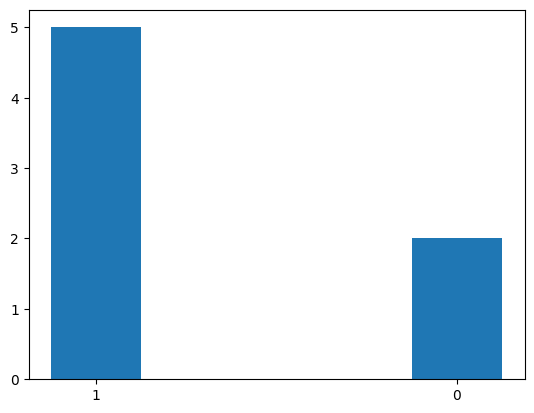

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class plotClassDistribution():
    def __init__(self,data):
        self.data = data
        self.key = self.data.keys()
        self.val = self.data.values()

    def plotGraph(self):
        plt.bar(list(self.key),list(self.val),width=0.25)

if __name__ == "__main__":
  ploting = plotClassDistribution({"1":5,"0":2})
  ploting.plotGraph()

In [ ]:
st1 = "https://www.youtube.com/watch?v=fSgK6uu-7tc"
st1 = st1.split("=")
print(st1)


['https://www.youtube.com/watch?v', 'fSgK6uu-7tc']


In [ ]:
! pip install transformers sentencepiece accelerate -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 22.2 MB/s eta 0:00:00


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:80: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
print(tokenizer.decode(model.generate(tokenizer.encode("what is astrology",return_tensors='pt'))[0]))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


what is astrology? Astrology is a science that studies the relationship between the planets and the stars
